In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


#read raw data
df1 = pd.read_csv("CLEANED_Monthly_Sales_KPEI_2ND.csv")


In [6]:
df1.head()

,month,KPEI01,KPEI02,KPEI03,KPEI04,KPEI05,KPEI06,KPEI07,KPEI08,KPEI09,...,KPEI29,KPEI30,KPEIASET03,KPEIM101,KPEIM102,KPEIM104,KPEIM110,KPEIM111,KPEIM112,KPEIM113
0,201801,366,366,366,366,366,366,366,366,366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201802,2232,2232,2232,2238,2238,2238,2232,2232,2238,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201803,11328,11274,9912,11202,9510,10608,9414,8982,9456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201804,10056,9837,6048,9198,5868,9132,6336,5142,5844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201805,12942,12330,6738,11778,6174,10944,7470,5448,6390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filling the Nan values to Zero

In [11]:
df1 = df1.replace(np.NaN,0)
df = df1.iloc[:,1:-1]
df.info()
#df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 98 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   KPEI01          45 non-null     int64  
 1   KPEI02          45 non-null     int64  
 2   KPEI03          45 non-null     int64  
 3   KPEI04          45 non-null     int64  
 4   KPEI05          45 non-null     int64  
 5   KPEI06          45 non-null     int64  
 6   KPEI07          45 non-null     int64  
 7   KPEI08          45 non-null     int64  
 8   KPEI09          45 non-null     int64  
 9   KPEI093HKSET01  45 non-null     float64
 10  KPEI10          45 non-null     int64  
 11  KPEI101         45 non-null     float64
 12  KPEI102         45 non-null     float64
 13  KPEI103         45 non-null     float64
 14  KPEI104         45 non-null     float64
 15  KPEI105         45 non-null     float64
 16  KPEI106         45 non-null     float64
 17  KPEI107         45 non-null     float

## Visualize Raw Data

In [13]:
df_50 = df.iloc[:,0:50]
df_100 = df.iloc[:,51:100]

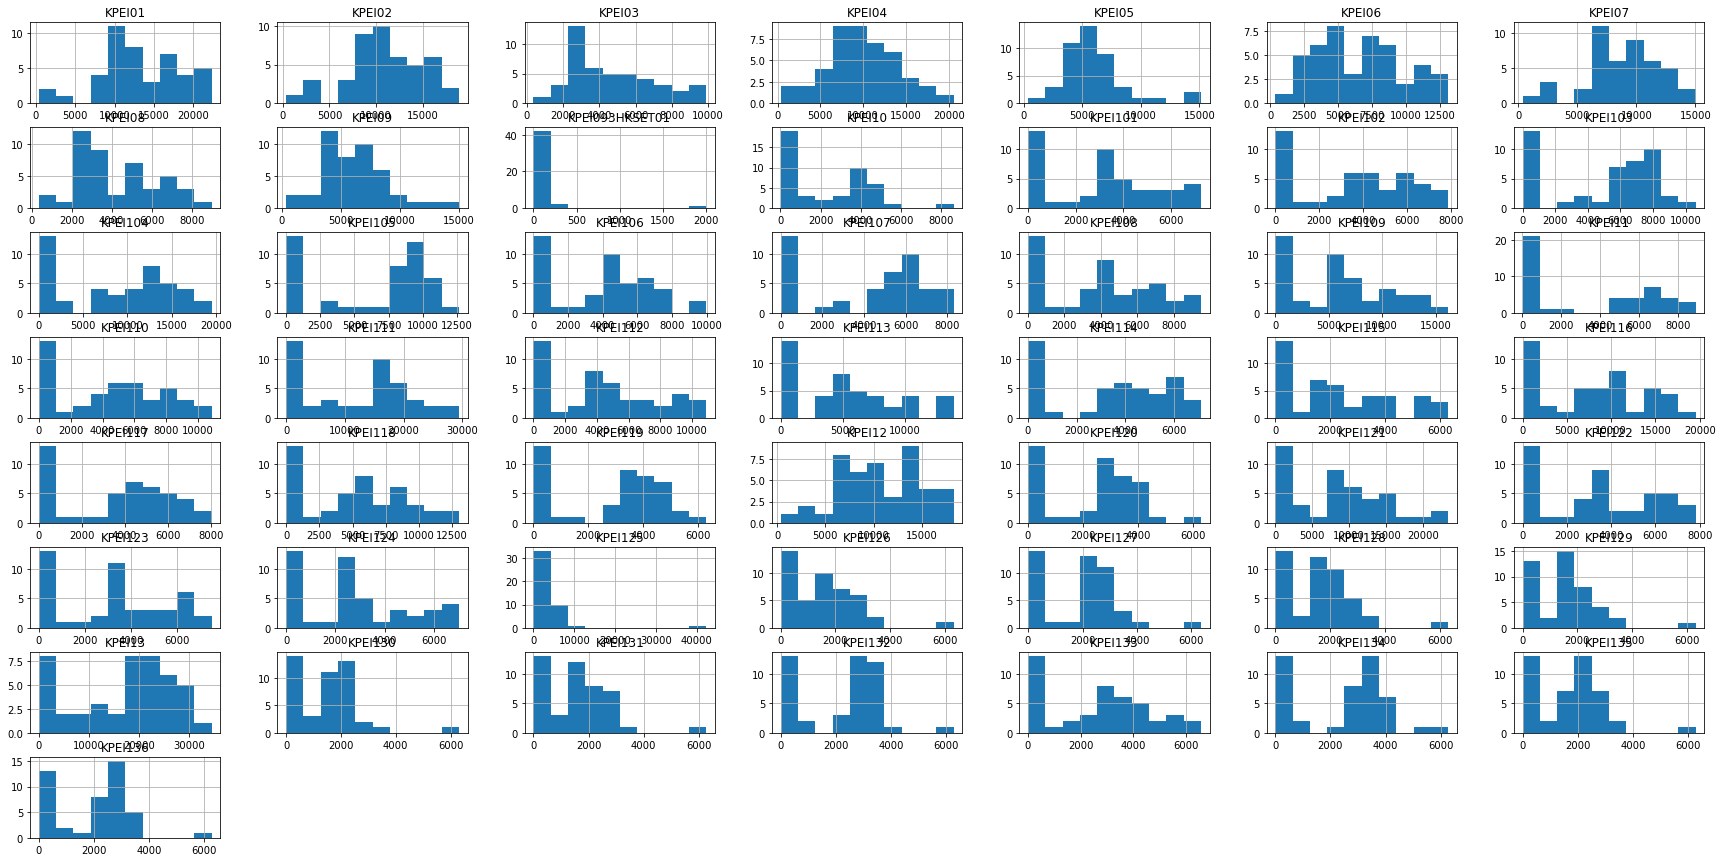

In [11]:

df_50.hist(figsize=(30,15))
plt.show()


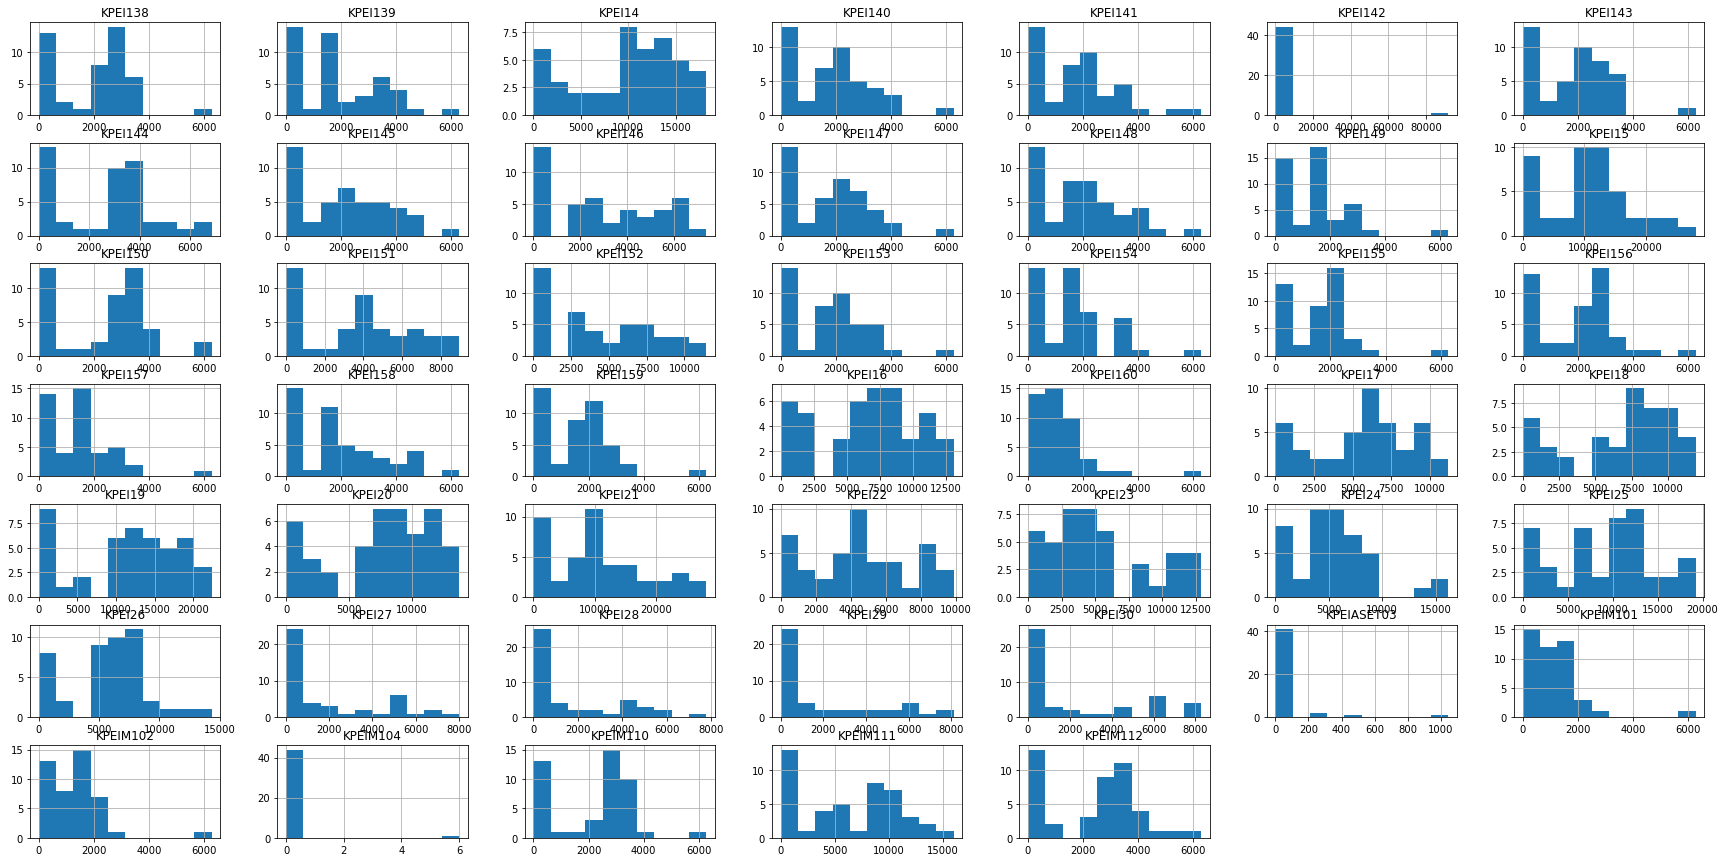

In [13]:
df_100 = df.iloc[:,51:100]
df_100.hist(figsize=(30,15))
plt.show()


# Scatter Plot for all columns


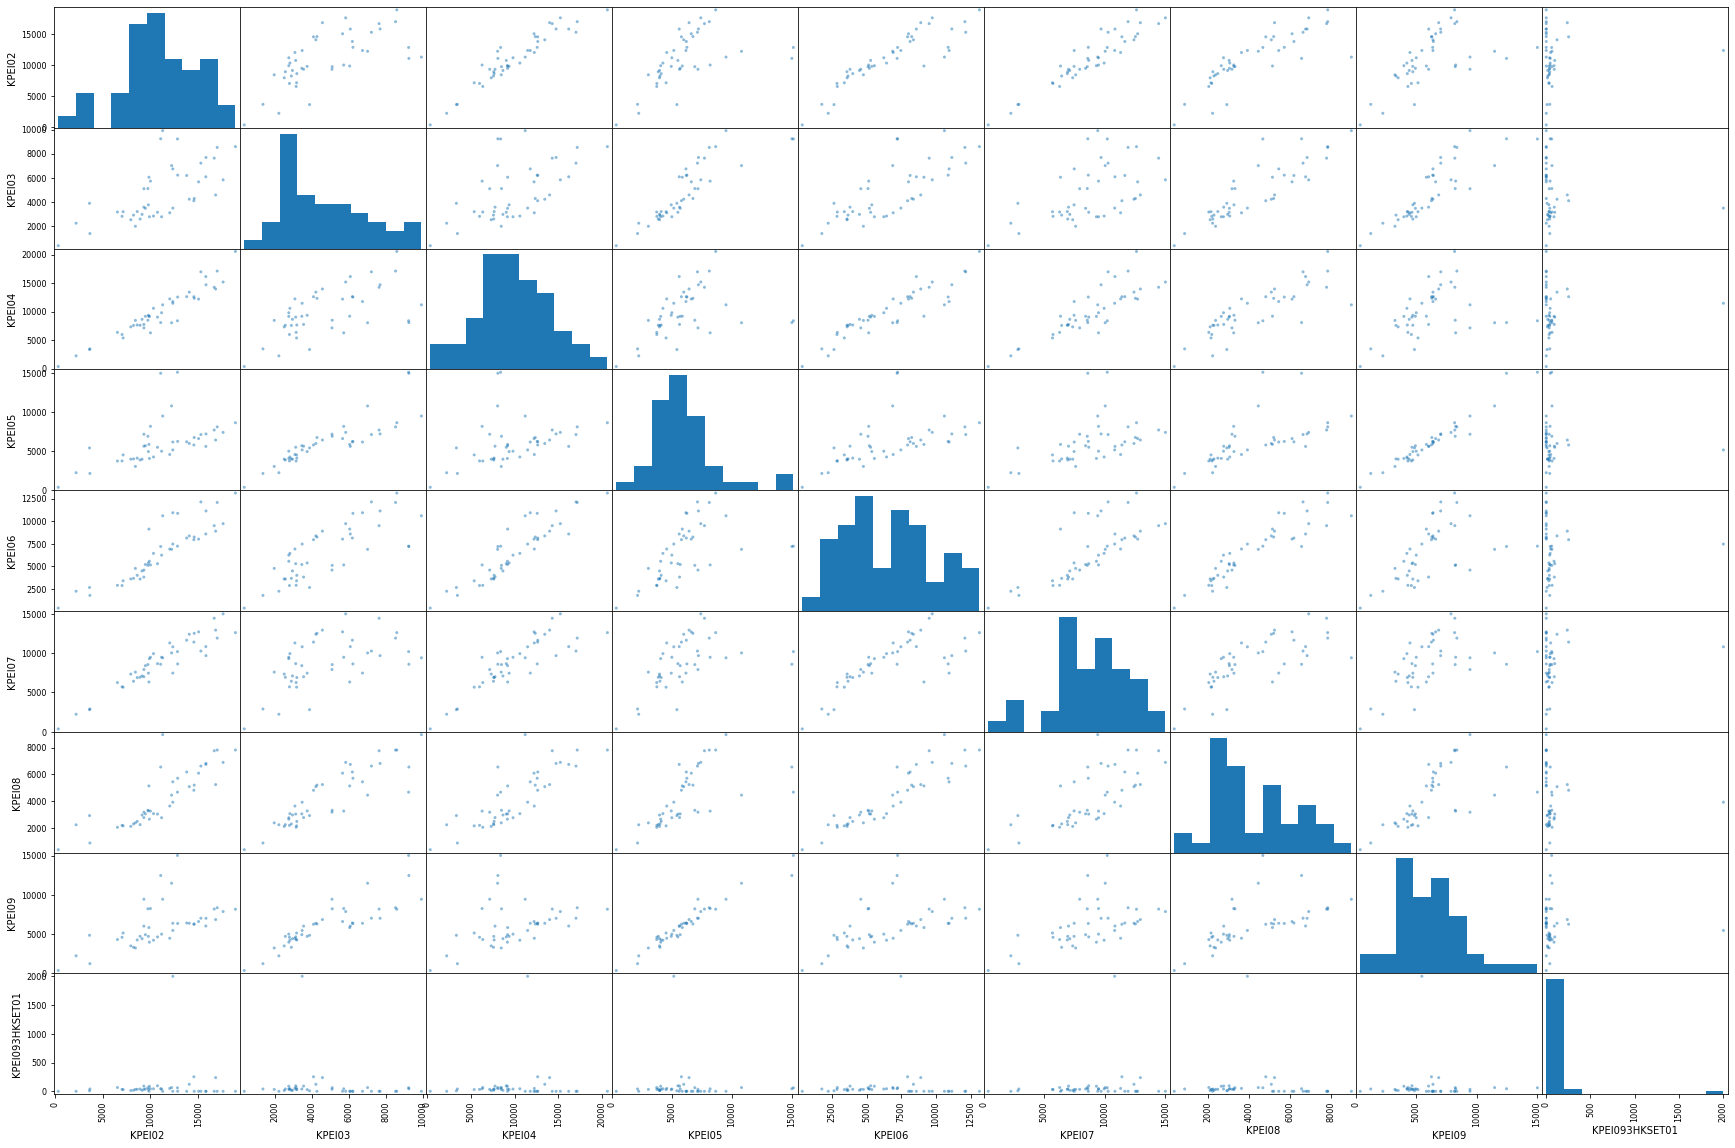

In [15]:
pd.plotting.scatter_matrix(df_50.iloc[:,1:10], figsize=(30,20))
plt.show()


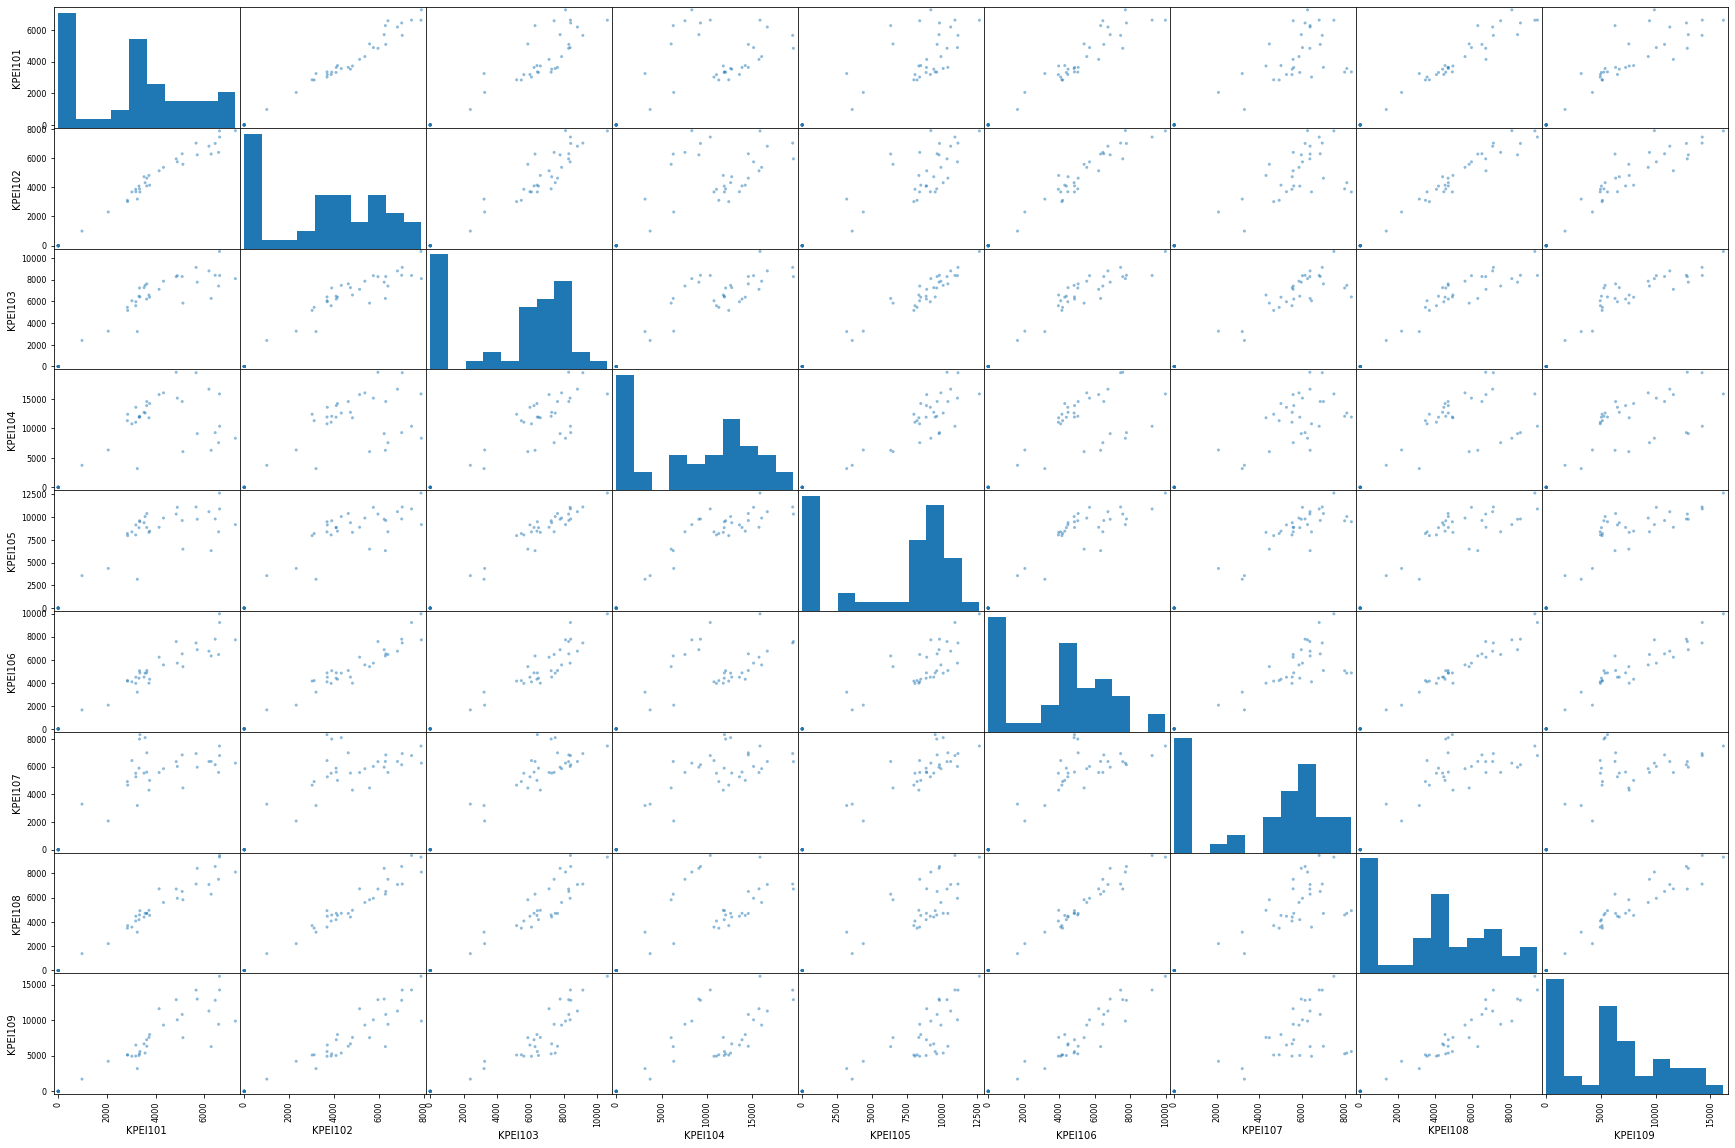

In [16]:
pd.plotting.scatter_matrix(df_50.iloc[:,11:20], figsize=(30,20))
plt.show()

# As the observation numbers are not sufficient, the visual confimration of distinct correlation is not confirmed. Correlation Priority


In [14]:

df_50_corr_mat = df_50.corr()
df_50_corr_mat.head()
#df_apt_weather_corr_mat["Total Electric Demand"].sort_values(ascending=False)

,KPEI01,KPEI02,KPEI03,KPEI04,KPEI05,KPEI06,KPEI07,KPEI08,KPEI09,KPEI093HKSET01,...,KPEI128,KPEI129,KPEI13,KPEI130,KPEI131,KPEI132,KPEI133,KPEI134,KPEI135,KPEI136
KPEI01,1.000000,0.934027,0.733919,0.854893,0.720468,0.827354,0.885960,0.812563,0.702295,0.087547,...,0.181548,0.186059,0.212955,0.176571,0.177576,0.039253,0.014851,0.028724,0.148481,0.053124
KPEI02,0.934027,1.000000,0.668554,0.947716,0.542953,0.888138,0.938335,0.834350,0.569356,0.070553,...,0.143546,0.147912,0.152954,0.097205,0.121687,0.002324,-0.080814,-0.012063,0.107679,0.004049
KPEI03,0.733919,0.668554,1.000000,0.595455,0.865904,0.785149,0.539941,0.882825,0.858265,-0.115031,...,-0.255318,-0.246726,-0.335861,-0.105308,-0.220485,-0.377728,-0.169286,-0.387708,-0.226418,-0.268077
KPEI04,0.854893,0.947716,0.595455,1.000000,0.370168,0.909947,0.849983,0.822009,0.385009,0.058386,...,-0.009687,-0.002270,0.044428,-0.102834,-0.046086,-0.140033,-0.287078,-0.148448,-0.070971,-0.175047
KPEI05,0.720468,0.542953,0.865904,0.370168,1.000000,0.539981,0.504172,0.642621,0.968593,-0.040396,...,0.050202,0.048872,0.010714,0.217089,0.101576,-0.031192,0.222472,-0.041855,0.096661,0.078227


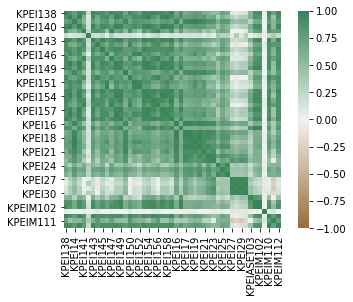

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_1 = df_50.corr()
correlation_2 = df_100.corr()
correlation_full = df.corr()

axis_corr = sns.heatmap(
correlation_2,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

In [16]:
corr = correlation_full["KPEI01"].sort_values(ascending=False)
corr.head()

KPEI01    1.000000
KPEI12    0.958000
KPEI02    0.934027
KPEI07    0.885960
KPEI04    0.854893
Name: KPEI01, dtype: float64

In [ ]:
# VISUALIZATION IN BAR PLOT

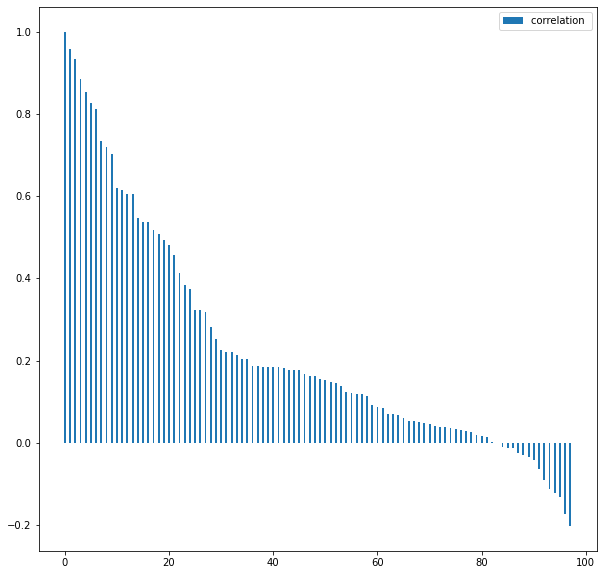

In [19]:
import numpy as np
x = np.arange(len(corr))
width = 0.35
#label = y_mean.index
plt.figure(figsize=(10,10))
plt.bar(x, corr, width,label="correlation ")
plt.legend()
plt.show()


# Standardization using pre-Processing


In [22]:

from sklearn.preprocessing import StandardScaler



In [23]:

#Setting the features
features1 =  df.columns
features = list(features1)

# separating
x = df.loc[:, features].values

# standardization
df_std = StandardScaler().fit_transform(x)



In [24]:
Cov = np.cov(df_std.T)
Cov

array([[ 1.02272727,  0.95525452,  0.75059865, ...,  0.04834873,
        -0.12564572,  0.11689856],
       [ 0.95525452,  1.02272727,  0.68374828, ..., -0.02194224,
        -0.26344515,  0.01288874],
       [ 0.75059865,  0.68374828,  1.02272727, ..., -0.345898  ,
        -0.26450377, -0.31036591],
       ...,
       [ 0.04834873, -0.02194224, -0.345898  , ...,  1.02272727,
         0.8072984 ,  0.99897939],
       [-0.12564572, -0.26344515, -0.26450377, ...,  0.8072984 ,
         1.02272727,  0.77306481],
       [ 0.11689856,  0.01288874, -0.31036591, ...,  0.99897939,
         0.77306481,  1.02272727]])

In [25]:
eig_vals, eig_vecs = np.linalg.eig(Cov)
eig_vals[0], eig_vals[1], eig_vals[2], eig_vals[3]

((63.453992667163675+0j),
 (14.538396473552014+0j),
 (7.253700947935047+0j),
 (5.124284586914089+0j))

In [30]:
#(eig_vals[0]+eig_vals[1]+eig_vals[2])/sum(eig_vals)
(eig_vals[0]+eig_vals[1])/sum(eig_vals)

(0.7781553565060064+0j)

# 85% of the variance of the dataset can be projected into 3 Principal Component and can be projected into 3 PCs

In [37]:
projected_X = df_std.dot(eig_vecs.T[0])
projected_X

array([  4.99419852+0.j,   6.1433892 +0.j, -25.55682001+0.j,
         0.12859103+0.j,  -4.62920316+0.j, -17.75034892+0.j,
       -10.77490389+0.j,  -8.81519191+0.j,  -5.24584294+0.j,
        -8.9484154 +0.j,  -2.77106012+0.j,  -3.76233835+0.j,
        -4.06145501+0.j,  -1.84477498+0.j,  -1.44187138+0.j,
         8.37561932+0.j,   4.72112027+0.j,  -0.54324945+0.j,
        -1.33933167+0.j,   0.24578575+0.j,  -0.42232145+0.j,
         2.30379746+0.j,   5.57926518+0.j,   4.48723273+0.j,
         2.25767556+0.j,   4.49717399+0.j,   3.0877905 +0.j,
         5.05820805+0.j,   6.40238186+0.j,   5.34404532+0.j,
        10.63752369+0.j,  10.86560394+0.j,  12.77772627+0.j])

In [57]:
result = pd.DataFrame(projected_X, columns = ['Principal Component1'])
df1_time = df1.iloc[:,0]
result


,Principal Component1
0,4.994199+0.000000j
1,6.143389+0.000000j
2,-25.556820+0.000000j
3,0.128591+0.000000j
4,-4.629203+0.000000j
5,-17.750349+0.000000j
6,-10.774904+0.000000j
7,-8.815192+0.000000j
8,-5.245843+0.000000j
9,-8.948415+0.000000j


In [88]:
# 2d Projection

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(df_std)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2']);

principalDf
#finalDF =  pd.concat([principalDf, df[['features']]], axis=1)

                                                                  

,PC 1,PC 2
0,-4.994199,-13.482748
1,-6.143389,-11.742529
2,25.556820,8.470914
3,-0.128591,-7.073648
4,4.629203,-4.894664
5,17.750349,3.866531
6,10.774904,-1.244449
7,8.815192,-0.760427
8,5.245843,-2.692299
9,8.948415,-1.120538


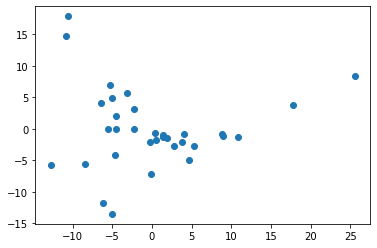

In [89]:
# Visualization

plt.scatter(principalDf['PC 1'], principalDf['PC 2'])
plt.show()



## K-Means Clustering
